In [111]:
#export
import os
import PIL
import torch
import numpy as np
from path import Path
import pandas as pd
import random
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF

In [7]:
from matplotlib import pyplot as plt


In [9]:
data_path = Path('../../filtered_ds/')

In [117]:
next(iter())

(0, name        fake/vmcdalwkvo
 label                     1
 is_valid              False
 Name: 0, dtype: object)

In [133]:
inds = []
for index, row in data_df.iterrows():
    if len(os.listdir(data_path/row['name']))<30:
        inds.append(index)

In [137]:
data_df=data_df.drop(index=inds).reset_index(drop=True)

In [138]:
data_df.to_csv(data_path/'videos_df')

In [109]:
data_df.name=data_df.name.apply(lambda x: x.split('/')[0]+'/'+x.split('/')[1])

In [114]:
data_df = data_df.drop_duplicates().reset_index(drop=True);
data_df

,name,label,is_valid
0,fake/vmcdalwkvo,1,False
1,real/vmcdalwkvo,0,False
2,fake/jhttzsdeke,1,False
3,real/jhttzsdeke,0,False
4,fake/wzrwsreyep,1,False
5,real/wzrwsreyep,0,False
6,fake/seddkcboce,1,False
7,real/seddkcboce,0,False
8,fake/bxqercyauk,1,False
9,real/bxqercyauk,0,False


In [110]:
data_df.head()

,name,label,is_valid
0,fake/vmcdalwkvo,1,False
1,real/vmcdalwkvo,0,False
2,fake/jhttzsdeke,1,False
3,real/jhttzsdeke,0,False
4,fake/wzrwsreyep,1,False


In [74]:
os.listdir(data_path)

['.DS_Store', 'images_df', 'real', 'fake']

In [92]:
data_df.iloc[:,1]

0         1
1         0
2         1
3         0
4         1
5         0
6         1
7         0
8         1
9         0
10        1
11        0
12        1
13        0
14        1
15        0
16        1
17        0
18        1
19        0
20        1
21        0
22        1
23        0
24        1
25        0
26        1
27        0
28        1
29        0
         ..
167348    1
167349    0
167350    1
167351    0
167352    1
167353    0
167354    1
167355    0
167356    1
167357    0
167358    1
167359    0
167360    1
167361    0
167362    1
167363    0
167364    1
167365    0
167366    1
167367    0
167368    1
167369    0
167370    1
167371    0
167372    1
167373    0
167374    1
167375    0
167376    1
167377    0
Name: label, Length: 167378, dtype: int64

In [108]:
data_df = pd.read_csv(data_path/'images_df')

In [139]:
data_df.head()

,name,label,is_valid
0,fake/vmcdalwkvo,1,False
1,real/vmcdalwkvo,0,False
2,fake/jhttzsdeke,1,False
3,real/jhttzsdeke,0,False
4,fake/wzrwsreyep,1,False


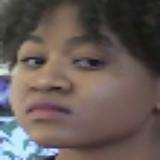

In [76]:
PIL.Image.open(data_path/data_df.name[0])

In [10]:
import time

In [145]:
#export
class VideoDataset(torch.utils.data.Dataset):
    def __init__(self, csv_file, root_dir, split,
                 phase=None,
                 video_len=30,
                 crop_size=160,
                 label_col='label',
                 transform=True,
                 ):
        
        self.video_dataframe = pd.read_csv(csv_file)
        self.video_dataframe = self.video_dataframe[self.video_dataframe.is_valid==(split=='test')].reset_index(drop=True)
        self.phase = split if phase is None else phase
        self.root_dir = Path(root_dir)
        self.lbl_cl = label_col
        self.video_len = video_len
        self.crop_size = crop_size
        self.transform=transform
        self.mean, self.std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
        
        
    def __len__(self):
        return len(self.video_dataframe)
    
    def apply_transforms(self, video):
        if not self.transform: return video
        if 'train' == self.phase:
            # Resize
            resize = transforms.Resize(size=(self.crop_size+20, self.crop_size+20))
            video = [resize(im) for im in video]

            # Random crop
            i, j, h, w = transforms.RandomCrop.get_params(
                video[0], output_size=(self.crop_size, self.crop_size))
            video = [TF.crop(im, i, j, h, w) for im in video]
            
            # Random horizontal flipping
            if random.random() > 0.5:
                video = [TF.hflip(im) for im in video]

            #    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0),  
        else:
            resize = transforms.Resize(size=(self.crop_size, self.crop_size))
            video = [resize(im) for im in video]
            
        # Transform to tensor
        
        return [TF.normalize(TF.to_tensor(im),self.mean, self.std) for im in video]
        
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        video_dir = self.root_dir/str(self.video_dataframe['name'][idx])
        sorted_frames = os.listdir(video_dir)
        sorted_frames.sort(key= lambda x : int(x.split('_')[-1][:-4]))
        
        video = ([PIL.Image.open(video_dir/im) for im in sorted_frames])
        
        assert len(video)>=self.video_len
        video=video[:self.video_len]
        video = torch.stack(self.apply_transforms(video))

        label = self.video_dataframe[self.lbl_cl][idx]
        
        data = (video, label)
            
        return tuple(data)
    
    def unprocess_video(self, video, plot=False):
        def unprocess_image(im):
            im = im.squeeze().numpy().transpose((1, 2, 0))
            im = self.std * im + self.mean
            im = np.clip(im, 0, 1)
            im = im * 255
            return PIL.Image.fromarray(im.astype(np.uint8))
        
        video = [unprocess_image(im) for im in video]
        
        if plot:
            video_len = len(video)
            fig = plt.figure(figsize=(3,3*video_len))
            for idx in range(video_len):
                ax = fig.add_subplot(video_len, 1, idx+1) 
                ax.imshow(video[idx])
        else:
            return video

In [146]:
dataset = VideoDataset(data_path/'videos_df', data_path, split='train')

In [147]:
dataload = torch.utils.data.DataLoader(dataset, 
        batch_size=2, shuffle=False, num_workers=4, pin_memory=True)

In [148]:
next(iter(dataload))[0][1].size()

torch.Size([30, 3, 160, 160])

In [149]:
dataset[0][0].size()

torch.Size([30, 3, 160, 160])

In [150]:
len(dataset)

3958

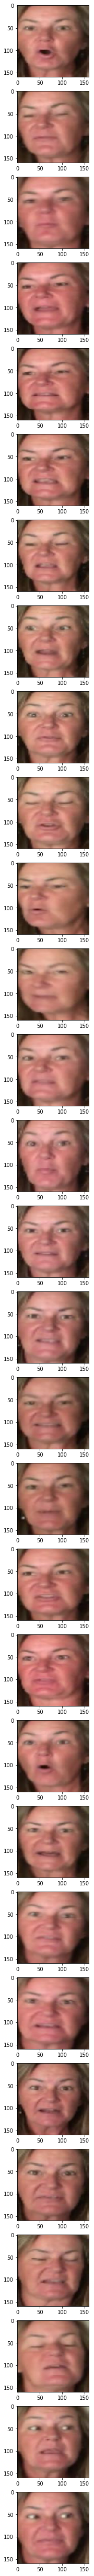

In [151]:
dataset.unprocess_video(dataset[9][0],plot=True)

In [18]:
dataset[0][0].size()

../../filtered_ds/fake/gutmvovhsj


torch.Size([90, 160, 160])

In [32]:
dataset[0][0].numpy().transpose((1, 2, 0))[:,:,0:3].shape

../../filtered_ds/fake/gutmvovhsj


(160, 160, 3)

In [ ]:

class GTSRBLoader(torch.utils.data.Dataset):

    def __init__(self, data_dir, split, custom_transforms=None, list_dir=None,
                 out_name=False,  crop_size=None, num_classes=43, phase=None):
        
        self.data_dir = data_dir
        self.split = split
        self.phase = split if phase is None else phase
        self.crop_size = 32 if crop_size is None else crop_size
        self.out_name = out_name
        self.idx2label = idx2label
        self.classnames = classnames

        self.num_classes = num_classes
        self.mean = np.array([0.3337, 0.3064, 0.3171])
        self.std = np.array([0.2672, 0.2564, 0.2629])
        self.image_list, self.label_list = None, None
        self.read_lists()
        self.transforms = self.get_transforms(custom_transforms)


    def __getitem__(self, index):
        im = Image.open(f'{self.data_dir}/{self.image_list[index]}')
        data = [self.transforms(im)]
        data.append(self.label_list[index])
        if self.out_name:
            data.append(self.image_list[index])
        return tuple(data)


    def __len__(self):
        return len(self.image_list)


    def get_transforms(self, custom_transforms):
        if custom_transforms:
            return custom_transforms

        if 'train' == self.phase:
            return transforms.Compose([
                transforms.Resize((self.crop_size, self.crop_size)),
                transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0),
                transforms.ToTensor(),
                transforms.Normalize(mean=self.mean, std=self.std),
            ]) 
        else: 
            return transforms.Compose([
                transforms.Resize((self.crop_size, self.crop_size)),
                transforms.ToTensor(),
                transforms.Normalize(mean=self.mean, std=self.std),
            ])   


    def read_lists(self):
        image_path = os.path.join(self.data_dir, self.split + '_images.txt')
        assert os.path.exists(image_path)
        self.image_list = [line.strip().split()[0] for line in open(image_path, 'r')]
        self.label_list = [int(line.strip().split()[1]) for line in open(image_path, 'r')]
        assert len(self.image_list) == len(self.label_list)

    
    # get raw image prior to normalization
    # expects input image as torch Tensor
    def unprocess_image(self, im, plot=False):
        im = im.squeeze().numpy().transpose((1, 2, 0))
        im = self.std * im + self.mean
        im = np.clip(im, 0, 1)
        im = im * 255
        im = Image.fromarray(im.astype(np.uint8))
        
        if plot:
            plt.imshow(im)
            plt.show()
        else:
            return im
  
    # de-center images and bring them back to their raw state
    def unprocess_batch(self, input):
        for i in range(input.size(1)):
            input[:,i,:,:] = self.std[i] * input[:,i,:,:]
            input[:,i,:,:] = input[:,i,:,:] + self.mean[i]
            input[:,i,:,:] = np.clip(input[:,i,:,:], 0, 1)

        return input

## Export

In [152]:
!python notebook2script.py 00_video_dataset.ipynb

Converted 00_video_dataset.ipynb to exp/nb_00.py


### How it works:

In [5]:
import json
d = json.load(open('00_exports.ipynb','r'))['cells']

In [6]:
d[0]

{'cell_type': 'code',
 'execution_count': 1,
 'metadata': {'colab': {}, 'colab_type': 'code', 'id': 'zU99rdVg0fsO'},
 'outputs': [],
 'source': ['#export\n', "TEST = 'test'"]}